In [41]:
# Tensorflow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


## Import the Fashion MNIST dataset

We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories.
The images show indvidual articles of clothing at low resolution (28 by 28 pxiels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

Link to Fashion MNIST data:
Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:


In [42]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:
* The `train_images` and `train_labels` arrays are the training set-the data the model uses to learn.
* The model is tested against the test set, the `test_images` and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values rangin from 0 to 255. The labels are array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to single label.
Since the *class names* are not included with the dataset, store them here to use later when plotting images:

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of  the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [44]:
train_images.shape

(60000, 28, 28)

In [45]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [46]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set.
Again, eachimage is represented as 28 x 28 pixels:

In [47]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [48]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:


In [49]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network.
Let's inspect the first image in the training set.

It looks like pixels values fall in the range of 0 to 255:

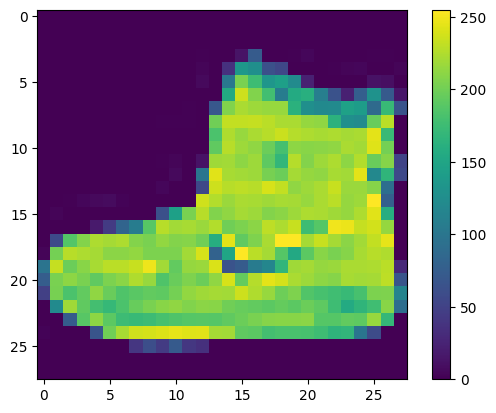

In [50]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these value between range of 0 to 1 before feeding them to the neural network model.
To do so we will divide the values by 255.
And let's make sure that *training set* and the *testing set* be preprocessed in the same way:

In [51]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Let's verify the data is in correct format and we are ready to build  and train the network by displaying first 25 images from the *training set* and dispaly the class name below each image.

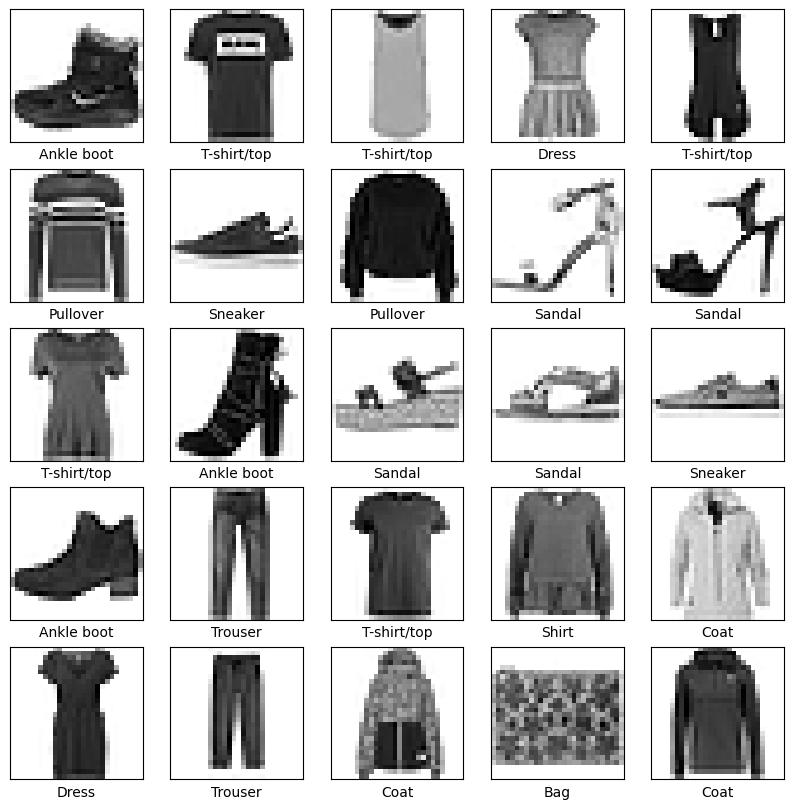

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers
The basic building block of a neural network is the *layer*. Layers extract representaions from the data fed into them.
Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consist of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28*28 = 748 pixels). Think of this layer as unstacking  rows of pixels in the image and lining them up . This layer has no paremters to learn; it only reformats the data.

After the pixels are flattended, the networks consist of a sequence of two `tf.keras.layers.Dense` layers.
These are dense connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to on of the 10 classes.


## Compile the model
Before the model is ready for training, it needs a few more settings. Thse are added during the model's *compile* step:

* Loss function - This measure how accurate the model is during training. We want to minimize this function  to "steer" the model in the right directiion
* Optimizer - This is how the model is updated based on the data it sees and its loss function.
* Metrics - Used to monitor the training and testing steps. Below we will use *accuracy* , the fraction of the images that are correctly classified.

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train model
Training the neural network model requires the following steps:

1. Feed the training data to the model. Here training data is in the `train_images` and `train_labels` array:
2. The model learns to associate images and labels.
3. Then we ask the model to make predictions about a test set- here the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.



## Feed the model

To start training, we will call the `model.fit` method-so called because it"fits" the model to the training data:


In [55]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4968 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3743 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3362 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3131 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2949 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2804 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2577 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2454 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.23

As the model trains, the loss accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

## Evaluate accuracy




In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 1s - loss: 0.3259 - accuracy: 0.8857 - 705ms/epoch - 2ms/step

Test accuracy: 0.885699987411499


Accuracy on test dataset is less than accuracy on the training dataset.
This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new , previously unseen inputs than it does on the trainign data.
An overfitted model "memorizes" the noise and details in the training dataset to a point wehr it negatively impacts the performance of the model on the new data.

## Make predictions

With the mode trained, we can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs -logits-to probabilites, which sould be easier to interpret.

In [57]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [58]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at first prediction:


In [59]:
predictions[0]

array([1.7976131e-09, 2.9716118e-14, 9.5210922e-12, 5.5694778e-14,
       5.6580318e-12, 4.3830774e-03, 1.4513266e-09, 6.2709255e-03,
       4.0059688e-11, 9.8934585e-01], dtype=float32)

A predictoin is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 differetn articles of clothing. We can see which label has the higherst confidence value:


In [60]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`
Let's test the label to see if this classificaiton is correct:


In [61]:
test_labels[0]

9

In [62]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions
With the model trained, we can use it to make predictions about some images.

let's look at the 0th image, predictions, and predictions array. Correct predictionn labels are blue and incorrect prediction labels are red. The number gives the percentgae(out of 100) for predicted label.

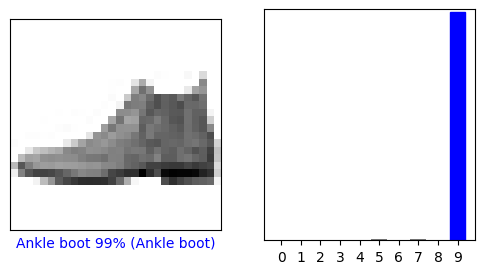

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

Let's plot several images with their predictions. It's imprtant to note that the model can be wrong even when very confident.

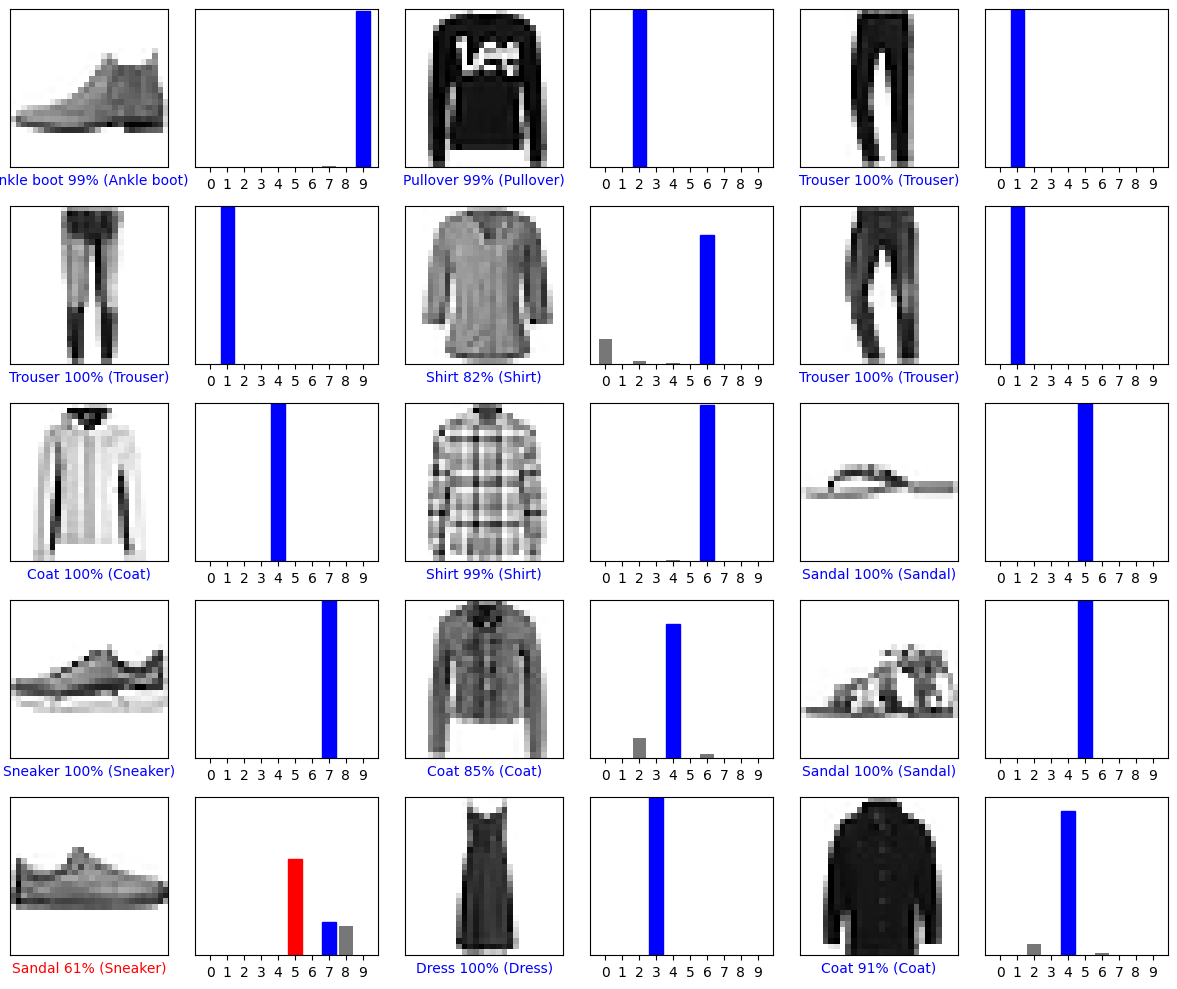

In [64]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect prediction in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [65]:
# Get a image from the test dataset.
img = test_images[i]

print(img.shape)

(28, 28)


`tf.keras` models are optimzed to make predictions on a batch, or collection, of examples at once. Thus, even though  we are using a single image, we need to add it to a list:

In [66]:
# Add the image to a batch where it's the only memeber.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [67]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[1.5997769e-04 5.4377258e-05 7.0741490e-02 2.5111390e-04 9.1350085e-01
  4.9855015e-10 1.5263124e-02 1.9088249e-09 2.9074423e-05 8.0411358e-11]]


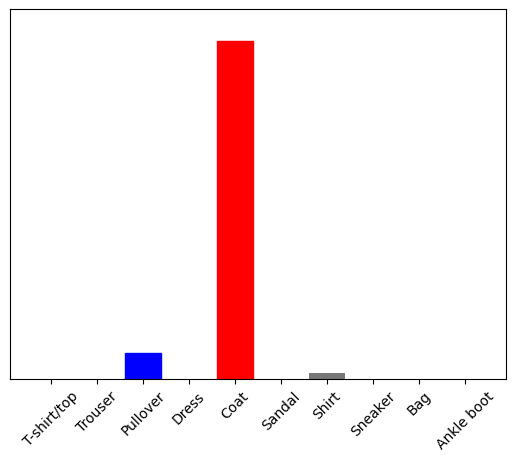

In [68]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists- one list for each image in the batch of data. Grab the predictions for our(only) image in the batch:


In [69]:
np.argmax(predictions_single[0])

4

And the model predicts a label as expected.